The provided Python script implements a basic logistic regression model with binary cross-entropy loss for classification. Here's a simple mathematical description of the steps:

### Mathematical Framework

1. **Data Generation:**
   The data $ X $ and labels $ Y $ are created using the `make_blobs` function:
   $$
   X \in \mathbb{R}^{n \times d}, \quad Y \in \{0, 1\}^n
   $$
   where $ n $ is the number of samples and $ d $ is the number of features.

2. **Model Parameters:**
   The model uses:
   - Weight vector $ W \in \mathbb{R}^d $
   - Bias $ b \in \mathbb{R} $

3. **Forward Pass:**
   The linear combination of inputs is:
   $$
   Z = X \cdot W + b
   $$
   The output probabilities are computed using the sigmoid activation function:
   $$
   \hat{y} = \sigma(Z) = \frac{1}{1 + e^{-Z}}
   $$

4. **Loss Function:**
   Binary cross-entropy loss is used:
   $$
   \text{Loss} = -\frac{1}{n} \sum_{i=1}^n \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
   $$

5. **Backward Pass (Gradient Calculation):**
   Gradients of the loss with respect to $ W $ and $ b $:
   $$
   \frac{\partial \text{Loss}}{\partial \hat{y}} = -\frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}}
   $$
   $$
   \frac{\partial \text{Loss}}{\partial Z} = \frac{\partial \text{Loss}}{\partial \hat{y}} \cdot \sigma'(Z)
   $$
   $$
   \frac{\partial \text{Loss}}{\partial W} = \frac{1}{n} \sum_{i=1}^n \left( \frac{\partial \text{Loss}}{\partial Z} \cdot X \right)
   $$
   $$
   \frac{\partial \text{Loss}}{\partial b} = \frac{1}{n} \sum_{i=1}^n \frac{\partial \text{Loss}}{\partial Z}
   $$

6. **Gradient Descent Update:**
   Model parameters are updated using:
   $$
   W \leftarrow W - \alpha \cdot \frac{\partial \text{Loss}}{\partial W}
   $$
   $$
   b \leftarrow b - \alpha \cdot \frac{\partial \text{Loss}}{\partial b}
   $$
   where $ \alpha $ is the learning rate.

7. **Visualization:**
   - A loss curve is plotted over iterations.
   - A decision boundary is plotted for the first two features to visualize the classifier's performance.

This script provides a straightforward implementation of logistic regression, with key components such as activation functions, gradient computation, and visualization of results.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs

In [2]:
"""Define functions, activation function,
loss function and their derivatives"""

def relu(x):
  return np.maximum(0, x)

def sig(x):
  return 1 / (1+np.exp(-x))

# def mse_loss(yh, y):
#   return 0.5 * (yh-y)**2

def bin_loss(y, yh):
  return -np.mean(y * np.log(yh) + (1 - y) * np.log(1 - yh))

def dev_relu(x):
  return np.where(x > 0, 1, 0)

def dev_sig(z):
  return sig(z) * (1-sig(z))

def dev_bin_loss(yh, y):
  return -(y/yh) + ((1-y)/(1-yh))

def dev_mse_loss(yh, y):
  return (yh-y)

In [3]:
# Initial values ' This sample create two bubble of data which randomly distributed
datasetX, datasetY = make_blobs(n_samples = 100,
                                n_features = 3,
                                centers=2,
                                center_box=(0.1, 10),
                                random_state = 1,
                                cluster_std = 0.1)
X = datasetX[:10].copy()
Y = datasetY[:10].copy()
print(X, Y, sep='\n')
print(X.shape, Y.shape, sep='\n')
# Init w, b
W = np.random.randn(3)
print(W)
b = 0

[[ 3.28870036  1.52023337  0.87988451]
 [ 4.14256625  7.26626708 -0.03009603]
 [ 4.11845593  7.34568486  0.19129138]
 [ 3.06822899  1.55725022  0.99152066]
 [ 4.27981083  7.2014032   0.14998413]
 [ 3.22623818  1.52415253  1.08215907]
 [ 3.07320868  1.48284347  0.99381264]
 [ 4.17807126  7.24721619  0.1887492 ]
 [ 4.13314779  7.20459063  0.10439377]
 [ 4.15980058  7.14669192  0.0340077 ]]
[1 0 0 1 0 1 1 0 0 0]
(10, 3)
(10,)
[-0.13790394 -0.7089257  -1.04404827]


In [4]:
# Forward calculation
# print(W.T)
# print(X)

# print(X.shape, W.shape)
# print(W.reshape(-1,1), X, sep='\n')

def forward(X, W, b):
  Z = np.dot(X,W) + b
  yh = sig(Z)

  return Z, yh

# print('Z')
# print(Z.reshape(-1,1))
# print('A')
# print(A.reshape(-1,1))
# print('yh')
# print(yh.reshape(-1,1))

In [5]:
# Backward calculation

def backward(yh, X, Y, Z):
  # number of sample m
  m = X.shape[0]
  da = dev_bin_loss(yh, Y) / m
  dz = dev_sig(Z) * da
  dw = np.dot(dz,X) / m
  db = np.sum(dz) / m

  return dw, db


# print('da')
# print(da)
# print(dev_sig(X).shape)

# print('dz')
# print(dz)


# print('dw')
# print(dw)



[ 0.74995673 -0.80154324 -0.64656433]
0.31258094637446493


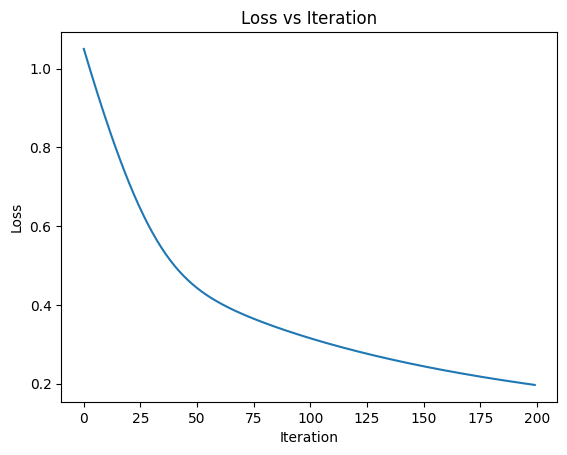

In [6]:
import matplotlib.pyplot as plt
# Gradient descending
## learning rate
alpha = 0.1
loss_history = []

iteration = 200

for it in np.arange(iteration):

  Z, yh = forward(X, W, b)
  dw, db = backward(yh, X, Y, Z)

  W = W - (alpha * dw)
  b = b - (alpha * db)

  loss = bin_loss(Y, yh)
  loss_history.append(loss)

print(W, b, sep='\n')
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs Iteration')
plt.show()

In [7]:
print(Y, yh, b, sep='\n')


[1 0 0 1 0 1 1 0 0 0]
[0.72836488 0.08459541 0.06872475 0.67249285 0.08757836 0.69114103
 0.68594685 0.07716982 0.08118816 0.08993163]
0.31258094637446493


In [8]:
predict_yh = sig(np.dot(datasetX, W) + b)
print(predict_yh)

[0.72938986 0.08428959 0.06847709 0.67356082 0.08730799 0.69227151
 0.68702073 0.07691346 0.08091159 0.0896334  0.09475894 0.08527078
 0.66609553 0.65419571 0.69225893 0.67049592 0.66219    0.66197181
 0.61006899 0.65726696 0.69277841 0.08103613 0.62482032 0.68774398
 0.67316036 0.08019155 0.72999483 0.09156941 0.08445125 0.65843178
 0.07629114 0.67243474 0.09109577 0.0803691  0.69099831 0.67956898
 0.64701027 0.07716115 0.10034526 0.07093794 0.67225758 0.07437813
 0.70532321 0.66705179 0.06654748 0.68179132 0.08390952 0.07171222
 0.08824878 0.08564196 0.65132678 0.08654108 0.72224757 0.08414679
 0.0891848  0.10227723 0.61759049 0.08127741 0.09508114 0.09096122
 0.0895007  0.68580701 0.09154011 0.7500835  0.67134802 0.07411207
 0.63066146 0.68168464 0.71081421 0.70135604 0.65267921 0.09076906
 0.71958532 0.08851625 0.08627227 0.08544468 0.0782642  0.08043188
 0.68475057 0.09365867 0.69622689 0.07372455 0.104869   0.08728947
 0.7019336  0.6491494  0.08308921 0.08257162 0.68450401 0.6696

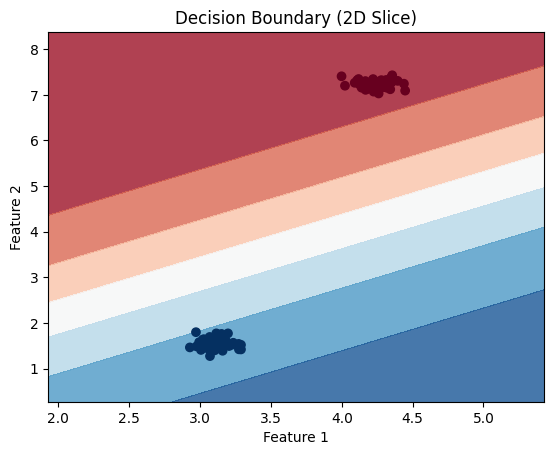

In [9]:
# Select the first two features for visualization
x1 = datasetX[:, 0]
x2 = datasetX[:, 1]

# Create a meshgrid for the decision boundary
x1_min, x1_max = x1.min() - 1, x1.max() + 1
x2_min, x2_max = x2.min() - 1, x2.max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                    np.arange(x2_min, x2_max, 0.1))

# Calculate the predicted probabilities for the meshgrid points
Z = sig(np.dot(np.c_[xx1.ravel(), xx2.ravel(), np.zeros_like(xx1.ravel())], W) + b) # Assuming the 3rd feature is 0 for the slice
Z = Z.reshape(xx1.shape)

# Plot the data points and the decision boundary
plt.contourf(xx1, xx2, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(x1, x2, c=datasetY, cmap=plt.cm.RdBu)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary (2D Slice)')
plt.show()

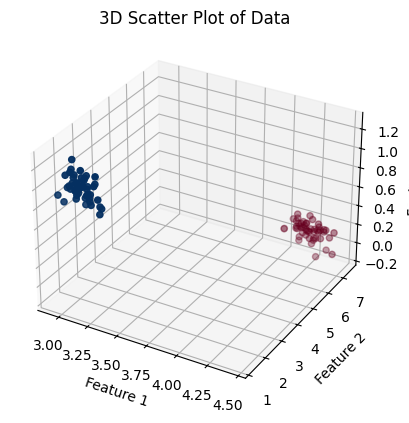

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(datasetX[:, 0], datasetX[:, 1], datasetX[:, 2], c=datasetY, cmap=plt.cm.RdBu)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('3D Scatter Plot of Data')
plt.show()